In [8]:
import numpy as np
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer.backends.qasm_simulator import QasmSimulator
from qiskit.visualization import plot_histogram
import pandas as pd
from fractions import Fraction

print("Imports Successful")

Imports Successful


In [9]:
#defining the U gates for mod 63
def c_amod63(a, power):
    """Controlled multiplication by a mod 63"""
    if a not in [2, 4, 5, 8, 10, 11, 13, 16, 17, 19, 20, 22, 23, 25, 26, 29, 31, 32, 34, 37, 38, 40, 41, 43, 44, 46, 47, 50, 52, 53, 55, 58, 59, 61, 62]:
        raise ValueError("'a' must be 2, 4, 5, 8, 10, 11, 13, 16, 17, 19, 20, 22, 23, 25, 26, 29, 31, 32, 34, 37, 38, 40, 41, 43, 44, 46, 47, 50, 52, 53, 55, 58, 59, 61, or 62")
    #the number of qubits used is 6 
    U = QuantumCircuit(6) 
    
    #implementing the swap gates for rotation 
    # we implement every number and see common behavior between the numbers
    for iteration in range(power):
        
        if a in [2,61]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)

        if a in [4, 59]:
            U.swap(0,2)
            U.swap(1,3)
            U.swap(2,4)
            U.swap(3,5)
            
        if a in [5, 58]:
            U.swap(0,2)
            U.swap(1,3)
            U.swap(0,4)
            U.swap(1,5)
            
        if a in [8, 55]:
            U.swap(0,3)
            U.swap(1,4)
            U.swap(2,5)
            
        if a in [10, 53]:
            U.swap(0,2)
            U.swap(1,3)
            U.swap(0,4)
            U.swap(1,5)
            U.swap(0,2)
            U.swap(1,3)
            U.swap(0,4)
            U.swap(1,5)
            
        if a in [11, 52]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            
        if a in [13, 50]:
            U.swap(0,5)
            U.swap(1,5)
            U.swap(2,5)
            U.swap(3,5)
            U.swap(4,5)
            
        if a in [16, 47]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            
       # if a in [17, 46]:
       # if a in [19, 44]:
        if a in [20, 43]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            
        if a in [22, 41]:
            U.swap(0,5)
            U.swap(1,5)
            U.swap(2,5)
            U.swap(3,5)
            U.swap(4,5)
        
        if a in [23, 40]: 
            U.swap(0,2)
            U.swap(1,3)
            U.swap(2,4)
            U.swap(3,5)
            
        if a in [25, 38]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
       # if a in [26, 37]:
    
        if a in [29, 34]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
            U.swap(3,4)
            U.swap(4,5)
            
        if a in [31, 32]:
            U.swap(0,5)
            U.swap(1,5)
            U.swap(2,5)
            U.swap(3,5)
            U.swap(4,5)
    
        if a in [62]:
            U.swap(0,3)
            U.swap(1,4)
            U.swap(2,5)
            
        if a in [5, 11, 13, 17, 19, 23, 25, 29, 31, 37, 41, 43, 47, 53, 55, 59, 61]:
            for q in range(6):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 63" % (a, power)
    c_U = U.control()
    return c_U

In [10]:
# Specify variables
n_count = 10  # number of counting qubits
a = 13

In [11]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

In [12]:
# Create QuantumCircuit with n_count counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(n_count + 10, n_count)

# Initialize counting qubits
# in state |+>
for q in range(n_count):
    qc.h(q)
    
# And auxiliary register in state |1>
qc.x(3+n_count)

# Do controlled-U operations
for q in range(n_count):
    qc.append(c_amod63(a, 2**q), 
             [q] + [i+n_count for i in range(6)])

# Do inverse-QFT
qc.append(qft_dagger(n_count), range(n_count))

# Measure circuit
qc.measure(range(n_count), range(n_count))
qc.draw(fold=-1)  # -1 means 'do not fold' 

┌───┐                                                                                                                                                                         ┌───────┐┌─┐                           
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├───────────────────────────
      ├───┤       │                                                                                                                                                                 │       │└╥┘┌─┐                        
 q_1: ┤ H ├───────┼───────────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├────────────────────────
      ├───┤       │               │                                                                                                                                                 │       │ ║ └╥┘┌─┐                     
 q_2: ┤ H ├───────┼───────────────┼───────────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├─────────────────────
      ├───┤       │               │               │                                                                                                                                 │       │ ║  ║ └╥┘┌─┐                  
 q_3: ┤ H ├───────┼───────────────┼───────────────┼───────────────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├──────────────────
      ├───┤       │               │               │               │                                                                                                                 │       │ ║  ║  ║ └╥┘┌─┐               
 q_4: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────────────■────────────────────────────────────────────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├───────────────
      ├───┤       │               │               │               │                │                                                                                                │  QFT† │ ║  ║  ║  ║ └╥┘┌─┐            
 q_5: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────────────┼────────────────■───────────────────────────────────────────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├────────────
      ├───┤       │               │               │               │                │                │                                                                               │       │ ║  ║  ║  ║  ║ └╥┘┌─┐         
 q_6: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────────────┼────────────────┼────────────────■──────────────────────────────────────────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├─────────
      ├───┤       │               │               │               │                │                │                │                                                              │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐      
 q_7: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────────────┼────────────────┼────────────────┼────────────────■─────────────────────────────────────────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │               │               │               │                │                │                │                │                                             │       │ ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_8: ┤ H ├───────┼───────────────┼───────────────┼───────────────┼────────────────┼────────────────┼────────────────┼────────────────┼─────────────────■───────────────────────────┤8      ├─╫──╫──╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │               │           

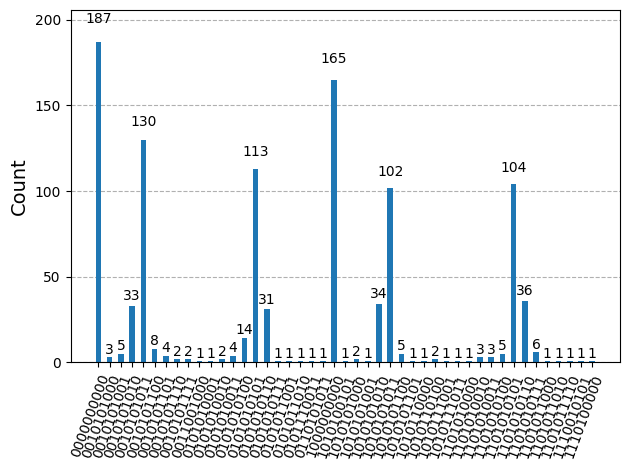

In [13]:
aer_sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, aer_sim)
# qobj = assemble(t_qc)
results = aer_sim.run(t_qc).result()
counts = results.get_counts()
plot_histogram(counts)

In [14]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**n_count)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)", 
                 f"{decimal}/{2**n_count} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

               Register Output            Phase
0   1010101011(bin) = 683(dec)  683/1024 = 0.67
1   0101010101(bin) = 341(dec)  341/1024 = 0.33
2   0010101011(bin) = 171(dec)  171/1024 = 0.17
3   1101011000(bin) = 856(dec)  856/1024 = 0.84
4   0010101010(bin) = 170(dec)  170/1024 = 0.17
5   0010101001(bin) = 169(dec)  169/1024 = 0.17
6   0000000000(bin) =   0(dec)    0/1024 = 0.00
7   1010101100(bin) = 684(dec)  684/1024 = 0.67
8   0101010100(bin) = 340(dec)  340/1024 = 0.33
9   0010101100(bin) = 172(dec)  172/1024 = 0.17
10  1000000000(bin) = 512(dec)  512/1024 = 0.50
11  1101010101(bin) = 853(dec)  853/1024 = 0.83
12  1101010110(bin) = 854(dec)  854/1024 = 0.83
13  1010101010(bin) = 682(dec)  682/1024 = 0.67
14  0101010110(bin) = 342(dec)  342/1024 = 0.33
15  1101011010(bin) = 858(dec)  858/1024 = 0.84
16  1110010101(bin) = 917(dec)  917/1024 = 0.90
17  0010101000(bin) = 168(dec)  168/1024 = 0.16
18  0101010011(bin) = 339(dec)  339/1024 = 0.33
19  1010101101(bin) = 685(dec)  685/1024

In [15]:
Fraction(0.666)

Fraction(5998794703657501, 9007199254740992)

In [29]:
# Get fraction that most closely resembles 0.666
# with denominator < 63
Fraction(0.666).limit_denominator(63)

Fraction(2, 3)

In [16]:

rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(63)
    rows.append([phase, f"{frac.numerator}/{frac.denominator}", frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

       Phase Fraction  Guess for r
0   0.666992      2/3            3
1   0.333008      1/3            3
2   0.166992      1/6            6
3   0.835938    51/61           61
4   0.166016      1/6            6
5   0.165039    10/61           61
6   0.000000      0/1            1
7   0.667969      2/3            3
8   0.332031      1/3            3
9   0.167969      1/6            6
10  0.500000      1/2            2
11  0.833008      5/6            6
12  0.833984      5/6            6
13  0.666016      2/3            3
14  0.333984      1/3            3
15  0.837891    31/37           37
16  0.895508    43/48           48
17  0.164062    10/61           61
18  0.331055      1/3            3
19  0.668945      2/3            3
20  0.168945    10/59           59
21  0.831055    49/59           59
22  0.834961    51/61           61
23  0.841797    16/19           19
24  0.830078    44/53           53
25  0.906250    29/32           32
26  0.661133    39/59           59
27  0.195312     8/4